In [1]:
# Air Quality Prediction System - O3 & NO2 Forecasting
# Clean, Production-Ready Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("🚀 Air Quality Prediction System Loaded")


🚀 Air Quality Prediction System Loaded


In [2]:
# Load datasets
df_train = pd.read_csv(r"C:\Users\User\Downloads\SIH_Data_PS-10\Data_SIH_2025\site_1_train_data.csv")
df_test = pd.read_csv(r"C:\Users\User\Downloads\SIH_Data_PS-10\Data_SIH_2025\site_1_unseen_input_data.csv")

print(f"✅ Training data loaded: {df_train.shape}")
print(f"✅ Test data loaded: {df_test.shape}")

✅ Training data loaded: (25081, 16)
✅ Test data loaded: (10872, 14)


In [3]:
# Data Overview
print("=== DATA OVERVIEW ===")
print(f"Training data: {df_train.shape[0]} samples, {df_train.shape[1]} features")
print(f"Test data: {df_test.shape[0]} samples, {df_test.shape[1]} features")
print(f"Training columns: {list(df_train.columns)}")
print(f"Test columns: {list(df_test.columns)}")


=== DATA OVERVIEW ===
Training data: 25081 samples, 16 features
Test data: 10872 samples, 14 features
Training columns: ['year', 'month', 'day', 'hour', 'O3_forecast', 'NO2_forecast', 'T_forecast', 'q_forecast', 'u_forecast', 'v_forecast', 'w_forecast', 'NO2_satellite', 'HCHO_satellite', 'ratio_satellite', 'O3_target', 'NO2_target']
Test columns: ['year', 'month', 'day', 'hour', 'O3_forecast', 'NO2_forecast', 'T_forecast', 'q_forecast', 'u_forecast', 'v_forecast', 'w_forecast', 'NO2_satellite', 'HCHO_satellite', 'ratio_satellite']


In [4]:
# Clean Air Quality Prediction System
def predict_air_quality():
    """
    Complete Air Quality Prediction Pipeline
    Predicts O3 and NO2 concentrations using ensemble machine learning
    """
    
    print("=== AIR QUALITY PREDICTION PIPELINE ===")
    
    # Step 1: Data Preprocessing
    print("1. Preprocessing data...")
    
    # Clean preprocessing function
    def preprocess_data(df):
        df_clean = df.copy()
        # Handle missing values
        df_clean = df_clean.fillna(df_clean.median())
        # Create seasonal feature
        if 'month' in df_clean.columns:
            df_clean['season'] = df_clean['month'].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3})
        return df_clean
    
    # Preprocess both datasets
    df_train_clean = preprocess_data(df_train)
    df_test_clean = preprocess_data(df_test)
    
    # Step 2: Feature Preparation
    print("2. Preparing features...")
    
    # Get common features between train and test
    exclude_cols = ['O3_target', 'NO2_target', 'year', 'month', 'day', 'hour']
    train_cols = [col for col in df_train_clean.columns if col not in exclude_cols]
    test_cols = [col for col in df_test_clean.columns if col not in exclude_cols]
    common_cols = list(set(train_cols) & set(test_cols))
    
    print(f"Using {len(common_cols)} common features")
    
    # Prepare training data
    X_train = df_train_clean[common_cols].copy()
    y_train = df_train_clean[['O3_target', 'NO2_target']].copy()
    
    # Prepare test data
    X_test = df_test_clean[common_cols].copy()
    
    # Final NaN handling
    X_train = X_train.fillna(X_train.median())
    y_train = y_train.fillna(y_train.median())
    X_test = X_test.fillna(X_test.median())
    
    print(f"Training features: {X_train.shape}")
    print(f"Test features: {X_test.shape}")
    
    # Step 3: Model Training
    print("3. Training models...")
    
    # Define models
    models = {
        'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
        'GradientBoosting': MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42)),
        'Ridge': MultiOutputRegressor(Ridge(alpha=1.0)),
        'Lasso': MultiOutputRegressor(Lasso(alpha=0.1))
    }
    
    # Train models
    trained_models = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"✅ {name} trained")
    
    # Step 4: Make Predictions
    print("4. Making predictions...")
    
    predictions = {}
    for name, model in trained_models.items():
        pred = model.predict(X_test)
        predictions[name] = pred
        print(f"✅ {name} predictions completed")
    
    # Create ensemble prediction
    ensemble_pred = np.mean(list(predictions.values()), axis=0)
    
    # Step 5: Create Results
    print("5. Creating results...")
    
    # Create results dataframe
    results_df = df_test.copy()
    results_df['O3_predicted'] = ensemble_pred[:, 0]
    results_df['NO2_predicted'] = ensemble_pred[:, 1]
    
    # Save results
    results_df.to_csv("air_quality_predictions.csv", index=False)
    
    # Save predictions only
    predictions_only = results_df[['O3_predicted', 'NO2_predicted']].copy()
    predictions_only.to_csv("O3_NO2_predictions.csv", index=False)
    
    print("✅ Results saved to CSV files")
    
    return results_df, predictions

print("🚀 Air Quality Prediction System Ready")


🚀 Air Quality Prediction System Ready


In [5]:
# Execute the prediction pipeline
results, individual_predictions = predict_air_quality()


=== AIR QUALITY PREDICTION PIPELINE ===
1. Preprocessing data...
2. Preparing features...
Using 11 common features
Training features: (25081, 11)
Test features: (10872, 11)
3. Training models...
Training RandomForest...
✅ RandomForest trained
Training GradientBoosting...
✅ GradientBoosting trained
Training Ridge...
✅ Ridge trained
Training Lasso...
✅ Lasso trained
4. Making predictions...
✅ RandomForest predictions completed
✅ GradientBoosting predictions completed
✅ Ridge predictions completed
✅ Lasso predictions completed
5. Creating results...
✅ Results saved to CSV files


=== PREDICTION RESULTS ===
O3 Predictions - Mean: 37.2950, Std: 13.5198
NO2 Predictions - Mean: 33.3157, Std: 9.6356
Total predictions made: 10872


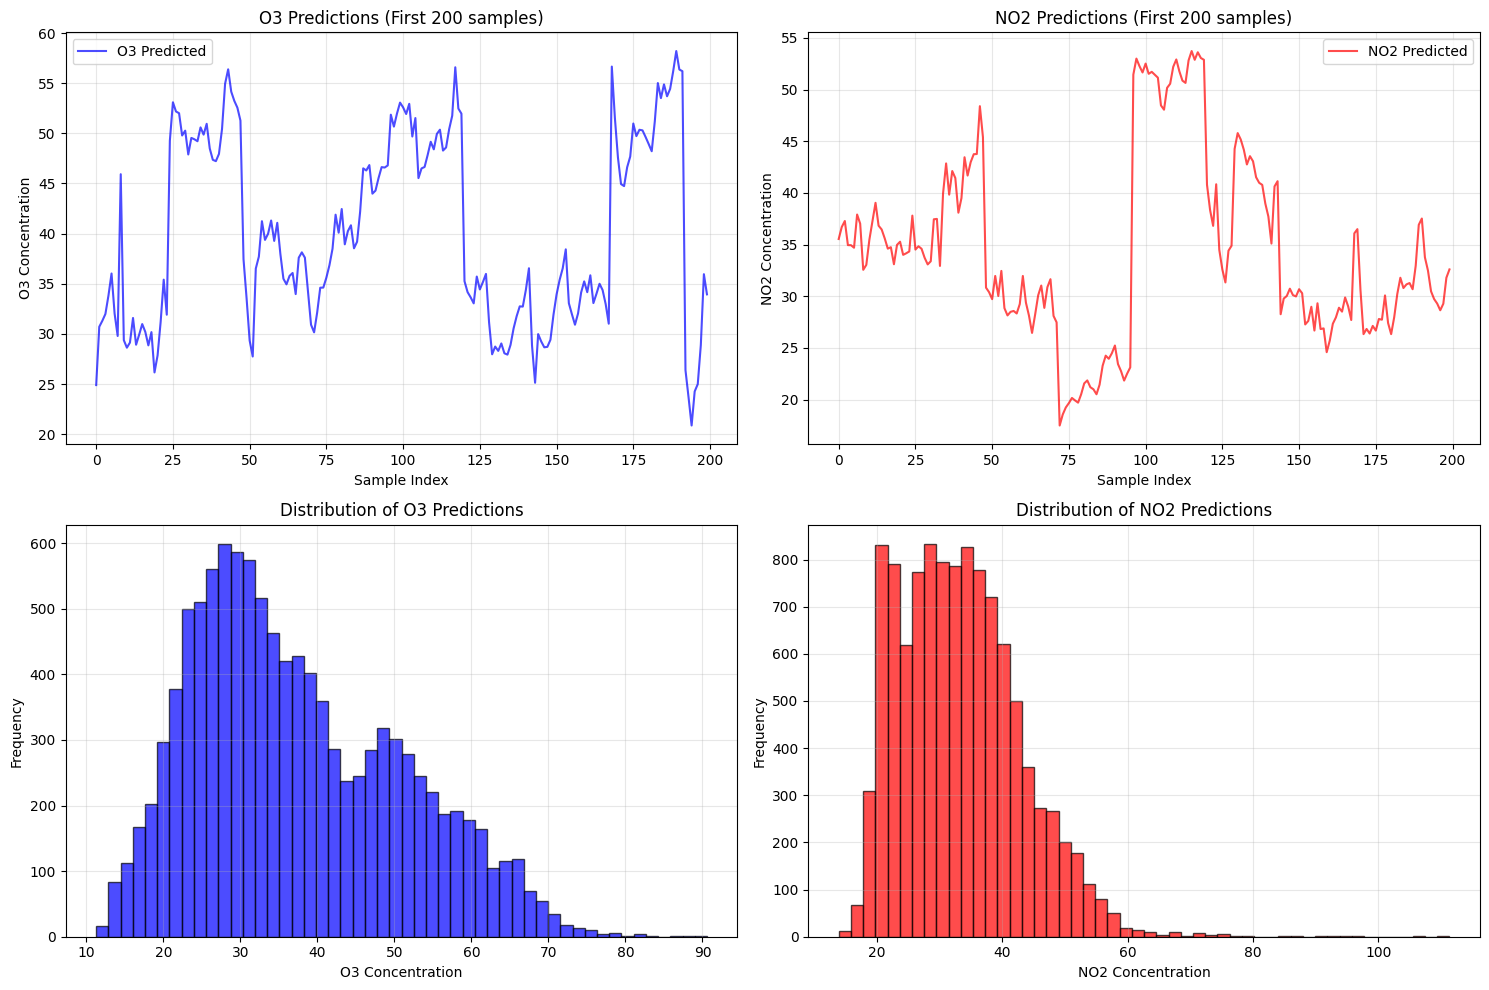

\n=== FILES CREATED ===
✅ air_quality_predictions.csv - Complete results with predictions
✅ O3_NO2_predictions.csv - O3 and NO2 predictions only
\n🎉 Air Quality Prediction Complete!


In [6]:
# Display Results and Visualizations
print("=== PREDICTION RESULTS ===")

# Show prediction statistics
print(f"O3 Predictions - Mean: {results['O3_predicted'].mean():.4f}, Std: {results['O3_predicted'].std():.4f}")
print(f"NO2 Predictions - Mean: {results['NO2_predicted'].mean():.4f}, Std: {results['NO2_predicted'].std():.4f}")
print(f"Total predictions made: {len(results)}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot O3 predictions
axes[0, 0].plot(results.index[:200], results['O3_predicted'][:200], 'b-', label='O3 Predicted', alpha=0.7)
axes[0, 0].set_title('O3 Predictions (First 200 samples)')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('O3 Concentration')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot NO2 predictions
axes[0, 1].plot(results.index[:200], results['NO2_predicted'][:200], 'r-', label='NO2 Predicted', alpha=0.7)
axes[0, 1].set_title('NO2 Predictions (First 200 samples)')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('NO2 Concentration')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Distribution of O3 predictions
axes[1, 0].hist(results['O3_predicted'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].set_title('Distribution of O3 Predictions')
axes[1, 0].set_xlabel('O3 Concentration')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Distribution of NO2 predictions
axes[1, 1].hist(results['NO2_predicted'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1, 1].set_title('Distribution of NO2 Predictions')
axes[1, 1].set_xlabel('NO2 Concentration')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\n=== FILES CREATED ===")
print("✅ air_quality_predictions.csv - Complete results with predictions")
print("✅ O3_NO2_predictions.csv - O3 and NO2 predictions only")
print("\\n🎉 Air Quality Prediction Complete!")
